<a href="https://colab.research.google.com/github/realBagher/Image_Processing_OpenCV/blob/main/Steganography/Image_steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Steganography

Image steganography is the technique of hiding a secret message or information within an image. In this implementation, we will use the least significant bits of the RGB values of each pixel of the image to hide another image.

In [4]:
import numpy as np 
import cv2 
from PIL import Image
import matplotlib.pyplot as plt


In [6]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

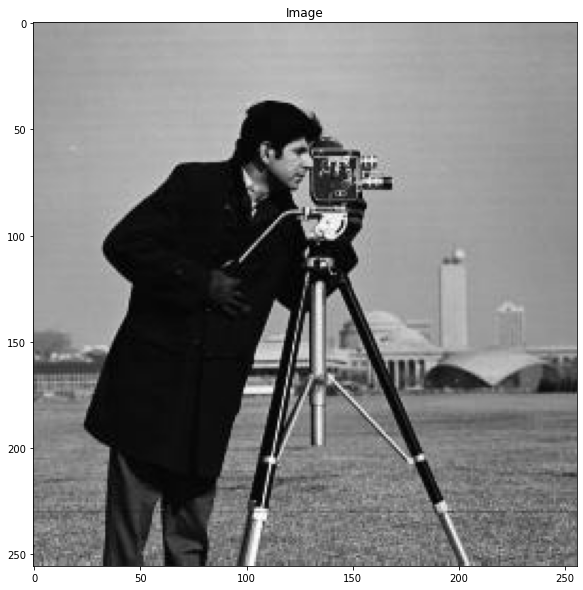

In [8]:
image = cv2.imread('/content/camera_256.JPG')
imshow(image=image)

In [17]:
image_hidden = cv2.imread('/content/Logo_NIT_Binary.png')
resized = cv2.resize(image_hidden, (15,15), interpolation=cv2.INTER_CUBIC)

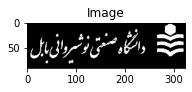

In [16]:
imshow(image=image_hidden)

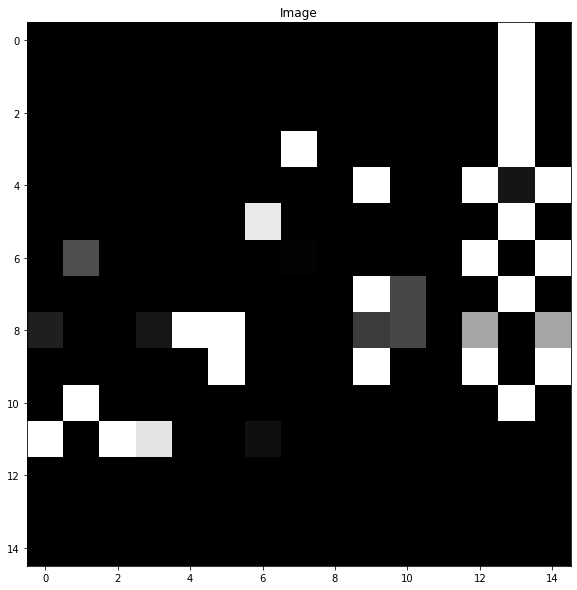

In [18]:
imshow(image=resized)

## Least Significant Bit steganography

In [31]:
from PIL import Image
import os

def message_to_binary(message):
    binary_message = ''.join(format(ord(i), '08b') for i in message)
    return binary_message

def hide_image(image_filename, secret_image_filename, output_filename):
    # Open the cover image and secret image
    cover_image = Image.open(image_filename)
    secret_image = Image.open(secret_image_filename)
    secret_image = secret_image.resize((15, 15))

    # Ensure the secret image can fit inside the cover image
    cover_width, cover_height = cover_image.size
    secret_width, secret_height = secret_image.size
    if secret_width > cover_width or secret_height > cover_height:
        raise ValueError("Secret image is too large to fit inside cover image.")

    # Convert the secret image to RGB format
    secret_image = secret_image.convert("RGB")

    # Convert the secret image to binary format
    secret_pixels = secret_image.load()
    binary_secret = ''
    for i in range(secret_width):
        for j in range(secret_height):
            r, g, b = secret_pixels[i, j]
            binary_secret += format(r, '08b')
            binary_secret += format(g, '08b')
            binary_secret += format(b, '08b')

    # Hide the binary secret image in the cover image's least significant bits
    cover_pixels = cover_image.load()
    binary_secret_index = 0
    for i in range(cover_width):
        for j in range(cover_height):
            r, g, b = cover_pixels[i, j]
            if binary_secret_index < len(binary_secret):
                r = int(format(r, '08b')[:-1] + binary_secret[binary_secret_index], 2)
                binary_secret_index += 1
            if binary_secret_index < len(binary_secret):
                g = int(format(g, '08b')[:-1] + binary_secret[binary_secret_index], 2)
                binary_secret_index += 1
            if binary_secret_index < len(binary_secret):
                b = int(format(b, '08b')[:-1] + binary_secret[binary_secret_index], 2)
                binary_secret_index += 1
            cover_pixels[i, j] = (r, g, b)

    # Save the modified cover image with the secret image hidden inside
    cover_image.save(output_filename)

    # Clean up the temporary binary secret file
    # os.remove(binary_secret_filename)


In [32]:
hide_image('/content/camera_256.JPG', '/content/Logo_NIT_Binary.png','encoded_image.png')

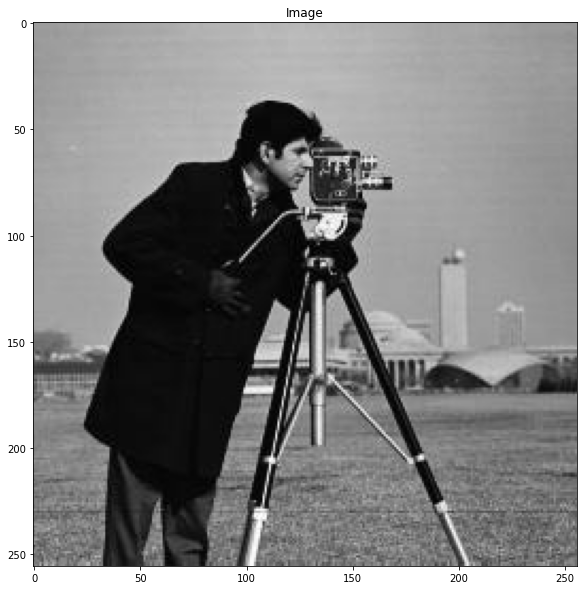

In [36]:
imshow(image=cv2.imread('/content/encoded_image.png'))

## Stenography between pixels 

In [37]:
from PIL import Image
import os

def hide_image(image_filename, secret_image_filename, output_filename):
    # Open the cover image and secret image
    cover_image = Image.open(image_filename)
    secret_image = Image.open(secret_image_filename)
    secret_image = secret_image.resize((15, 15))
    # Ensure the secret image can fit inside the cover image
    cover_width, cover_height = cover_image.size
    secret_width, secret_height = secret_image.size
    if secret_width * secret_height * 3 > cover_width * cover_height:
        raise ValueError("Secret image is too large to fit inside cover image.")

    # Convert the secret image to RGB format
    secret_image = secret_image.convert("RGB")

    # Get the pixels of the cover image
    cover_pixels = cover_image.load()

    # Loop through each pixel in the cover image and hide a pixel from the secret image in its least significant bits
    secret_pixels = secret_image.load()
    secret_index = 0
    for i in range(cover_width):
        for j in range(cover_height):
            if secret_index < secret_width * secret_height:
                r_cover, g_cover, b_cover = cover_pixels[i, j]
                r_secret, g_secret, b_secret = secret_pixels[secret_index % secret_width, secret_index // secret_width]
                r_cover = (r_cover & 0xFE) | (r_secret & 0x01)
                g_cover = (g_cover & 0xFE) | (g_secret & 0x01)
                b_cover = (b_cover & 0xFE) | (b_secret & 0x01)
                cover_pixels[i, j] = (r_cover, g_cover, b_cover)
                secret_index += 1

    # Save the modified cover image with the secret image hidden inside
    cover_image.save(output_filename)

In [38]:
hide_image('/content/camera_256.JPG', '/content/Logo_NIT_Binary.png', 'encoded_image_between_pixels.png')

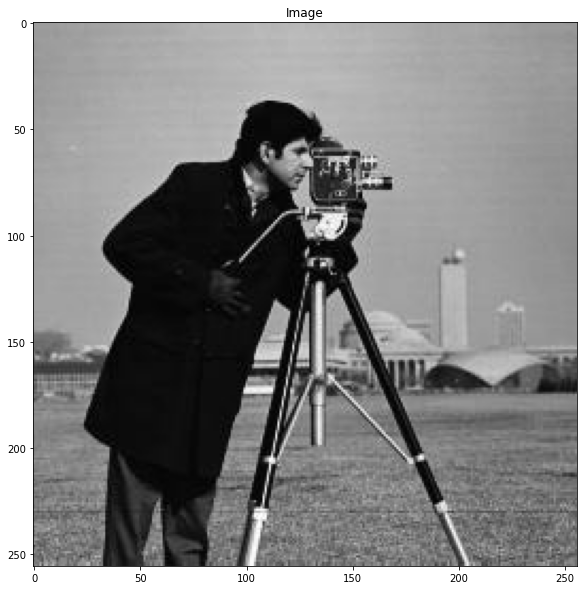

In [39]:
imshow(image=cv2.imread('/content/encoded_image.png'))

In [43]:
from PIL import Image
import os

def hide_image(image_filename, secret_image_filename, output_filename):
    # Open the cover image and secret image
    cover_image = Image.open(image_filename)
    secret_image = Image.open(secret_image_filename)
    secret_image = secret_image.resize((15, 15))
    # Ensure the secret image can fit inside the cover image
    cover_width, cover_height = cover_image.size
    secret_width, secret_height = secret_image.size
    if secret_width * secret_height * 3 > cover_width * cover_height:
        raise ValueError("Secret image is too large to fit inside cover image.")

    # Convert the secret image to RGB format
    secret_image = secret_image.convert("RGB")

    # Get the pixels of the cover image
    cover_pixels = cover_image.load()

    # Loop through each pixel in the cover image and hide a pixel from the secret image in its least significant bits
    secret_pixels = secret_image.load()
    secret_index = 0
    for i in range(secret_width):
        for j in range(secret_height):
           cover_pixels[i,j] = secret_pixels[i,j]

    # Save the modified cover image with the secret image hidden inside
    cover_image.save(output_filename)

In [44]:
hide_image('/content/camera_256.JPG', '/content/Logo_NIT_Binary.png', 'encoded_image_between_pixels.png')

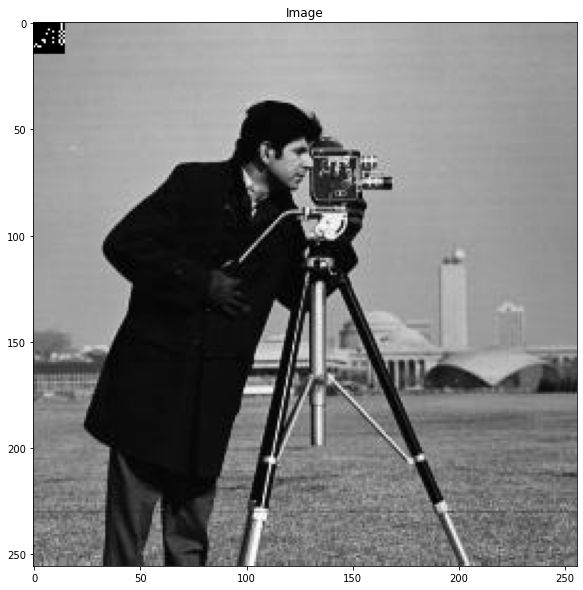

In [46]:
imshow(image=cv2.imread('/content/encoded_image_between_pixels.png'))

## MSE and PSNR Evaluation Metrics:

### MSE :

MSE (Mean Squared Error) is a commonly used evaluation metric in image processing to measure the quality of an image reconstruction or restoration algorithm. MSE compares the original image to the processed image, and calculates the average squared difference between the pixel intensities of the two images. The formula for calculating MSE is:



```
# MSE = (1 / n * m) * Σ(i=1 to n) Σ(j=1 to m) [I(i,j) - K(i,j)]^2
```
where n and m are the dimensions of the images, I is the original image, K is the processed image, and (i,j) represents the pixel location in the images.

MSE is calculated by taking the difference between the pixel values of each corresponding pixel in the original and processed images, squaring the difference, and then averaging the result over all pixels in the images. A lower MSE value indicates that the processed image is closer to the original image, with a value of 0 indicating a perfect reconstruction.

MSE is a useful metric for evaluating image processing algorithms because it is easy to calculate and provides a quantitative measure of the quality of the processed image. However, it has some limitations, such as not taking into account the perceptual differences between the images. For example, two images with the same MSE value can have different visual quality depending on the nature of the differences between the images.


In [47]:
from PIL import Image

def calculate_mse(image1_filename, image2_filename):
    # Load the images
    image1 = Image.open(image1_filename)
    image2 = Image.open(image2_filename)

    # Get the dimensions of the images
    width, height = image1.size

    # Ensure the images have the same size
    if image1.size != image2.size:
        raise ValueError("Images must have the same size.")

    # Get the pixel data for each image
    pixels1 = image1.load()
    pixels2 = image2.load()

    # Calculate the squared differences between the pixel intensities for each corresponding pixel in the images
    squared_differences = 0
    for x in range(width):
        for y in range(height):
            r1, g1, b1 = pixels1[x, y]
            r2, g2, b2 = pixels2[x, y]
            squared_differences += (r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2

    # Calculate the mean squared error
    mse = squared_differences / (width * height * 3)

    return mse

In [48]:
calculate_mse('/content/camera_256.JPG', '/content/encoded_image.png')

0.013458251953125

In [50]:
calculate_mse('/content/camera_256.JPG', '/content/encoded_image_between_pixels.png')

77.98678588867188

We can conclude now that LSB technique results in much more accurate image rather than in-between-pixels methon

##PSNR

 **PSNR (Peak Signal-to-Noise Ratio)** is another commonly used evaluation metric in image processing to measure the quality of an image reconstruction or restoration algorithm. PSNR is related to MSE, but provides a more human-friendly measure of the quality of an image reconstruction by measuring the ratio of the maximum possible power of the original image to the power of the noise that affects the reconstructed image.

The formula for calculating PSNR is:


```
PSNR = 10 * log10((MAX_I^2) / MSE)
```
where MAX_I is the maximum pixel intensity value (e.g. 255 for an 8-bit grayscale image), and MSE is the Mean Squared Error calculated between the original and reconstructed images.

PSNR is expressed in decibels (dB), with a higher value indicating better image quality. A PSNR of 30 dB or higher is generally considered to be an indication of good quality, while a PSNR of 40 dB or higher is considered to be very good.

PSNR is a useful metric for comparing different image reconstruction or restoration algorithms and determining which algorithm produces the best quality images. However, it also has some limitations, such as not taking into account the perceptual differences between the images and being sensitive to minor differences between the original and reconstructed images. Therefore, PSNR should be used in conjunction with other evaluation metrics and subjective evaluation methods to fully assess the quality of an image reconstruction algorithm



In [51]:
import math
from PIL import Image

def calculate_psnr(image1_filename, image2_filename):
    # Load the images
    image1 = Image.open(image1_filename)
    image2 = Image.open(image2_filename)

    # Get the dimensions of the images
    width, height = image1.size

    # Ensure the images have the same size
    if image1.size != image2.size:
        raise ValueError("Images must have the same size.")

    # Get the pixel data for each image
    pixels1 = image1.load()
    pixels2 = image2.load()

    # Calculate the squared differences between the pixel intensities for each corresponding pixel in the images
    squared_differences = 0
    for x in range(width):
        for y in range(height):
            r1, g1, b1 = pixels1[x, y]
            r2, g2, b2 = pixels2[x, y]
            squared_differences += (r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2

    # Calculate the mean squared error
    mse = squared_differences / (width * height * 3)

    # Calculate the maximum possible pixel intensity value
    max_pixel_intensity = 255

    # Calculate the PSNR
    psnr = 10 * math.log10(max_pixel_intensity ** 2 / mse)

    return psnr


In [52]:
psnr = calculate_psnr("/content/camera_256.JPG", "/content/encoded_image.png")
print(f"PSNR: {psnr}")


PSNR: 66.8409170635979


In [53]:
psnr = calculate_psnr("/content/camera_256.JPG", "/content/encoded_image_between_pixels.png")
print(f"PSNR: {psnr}")


PSNR: 29.21059338969727


based on explanation of the above metric it is also concluded that LSB technique is way better than the latter 

## Gausian Noise Filter 

In [57]:
import cv2
import numpy as np

def gausian_noise(path,m,var):
# Load the image
  img = cv2.imread(path)

# Generate a noise matrix with Gaussian distribution
  mean = m
  variance = var
  sigma = np.sqrt(variance)
  noise = np.zeros(img.shape, np.int16)
  cv2.randn(noise, mean, sigma)

# Add the noise to the image
  noisy_img = cv2.add(img, noise, dtype=cv2.CV_8UC3)

# Display the noisy image
  imshow(title='Noisy Image', image=noisy_img)
  return noisy_img


### helper functions :

In [60]:
def calculate_mse(image1_filename, image2_filename):
    # Load the images
    image1 = Image.fromarray(image1_filename)
    image2 = Image.open(image2_filename)

    # Get the dimensions of the images
    width, height = image1.size

    # Ensure the images have the same size
    if image1.size != image2.size:
        raise ValueError("Images must have the same size.")

    # Get the pixel data for each image
    pixels1 = image1.load()
    pixels2 = image2.load()

    # Calculate the squared differences between the pixel intensities for each corresponding pixel in the images
    squared_differences = 0
    for x in range(width):
        for y in range(height):
            r1, g1, b1 = pixels1[x, y]
            r2, g2, b2 = pixels2[x, y]
            squared_differences += (r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2

    # Calculate the mean squared error
    mse = squared_differences / (width * height * 3)

    return mse

In [62]:
def calculate_psnr(image1_filename, image2_filename):
    # Load the images
    image1 = Image.fromarray(image1_filename)
    image2 = Image.open(image2_filename)

    # Get the dimensions of the images
    width, height = image1.size

    # Ensure the images have the same size
    if image1.size != image2.size:
        raise ValueError("Images must have the same size.")

    # Get the pixel data for each image
    pixels1 = image1.load()
    pixels2 = image2.load()

    # Calculate the squared differences between the pixel intensities for each corresponding pixel in the images
    squared_differences = 0
    for x in range(width):
        for y in range(height):
            r1, g1, b1 = pixels1[x, y]
            r2, g2, b2 = pixels2[x, y]
            squared_differences += (r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2

    # Calculate the mean squared error
    mse = squared_differences / (width * height * 3)

    # Calculate the maximum possible pixel intensity value
    max_pixel_intensity = 255

    # Calculate the PSNR
    psnr = 10 * math.log10(max_pixel_intensity ** 2 / mse)

    return psnr

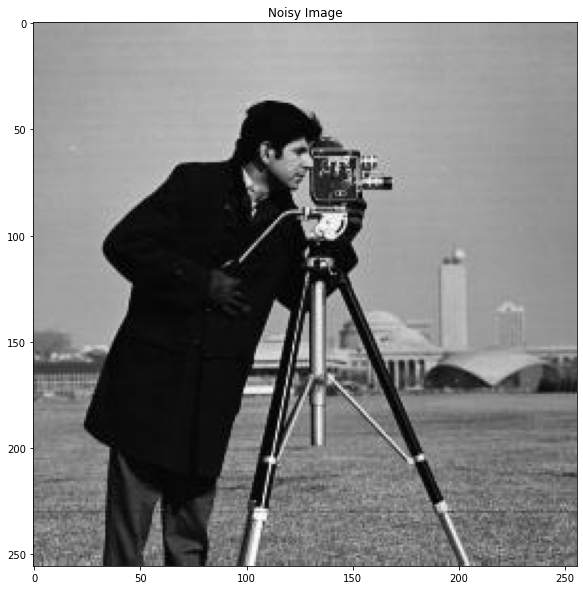

mse 0.013585408528645834
psnr 66.80007658189899


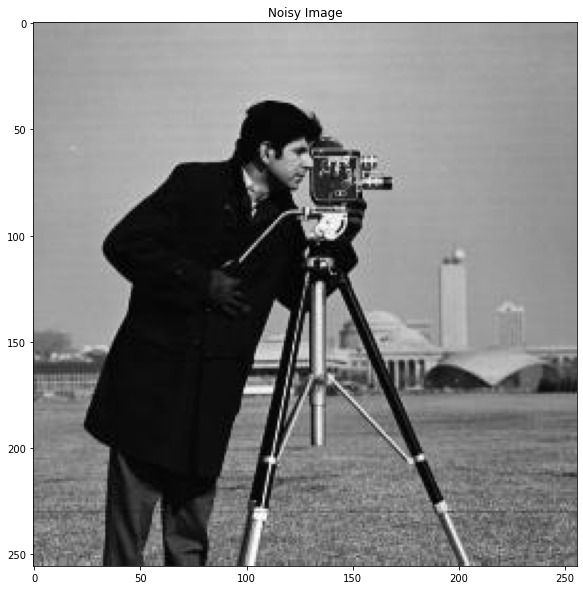

mse 0.07943216959635417
psnr 59.13083935913178


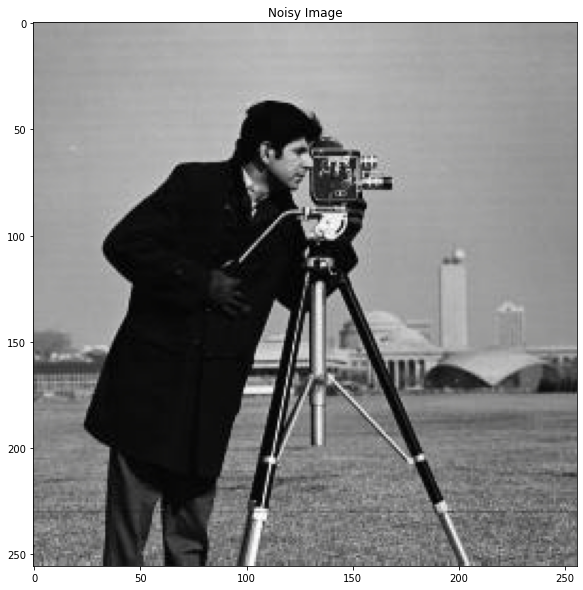

mse 0.2077484130859375
psnr 54.95542645815626


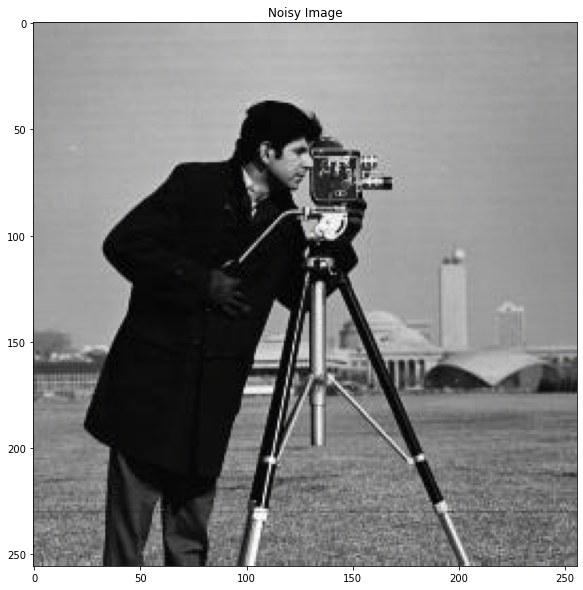

mse 0.7041524251302084
psnr 49.654136815160115


In [72]:
mse = []
psnr = []
for i in [0.02,0.15,0.5,2]:
  temp = gausian_noise('/content/encoded_image.png',0,i)
  print('mse',calculate_mse(temp,'/content/camera_256.JPG'))
  print('psnr',calculate_psnr(temp,'/content/camera_256.JPG'))
  mse.append(calculate_mse(temp,'/content/camera_256.JPG'))
  psnr.append(calculate_psnr(temp,'/content/camera_256.JPG'))


In [64]:
mse

[0.0136566162109375,
 0.07933553059895833,
 0.20622762044270834,
 0.7099202473958334]

In [65]:
psnr

[66.77737256175698, 59.13612630205999, 54.98733530169992, 49.61870798150735]

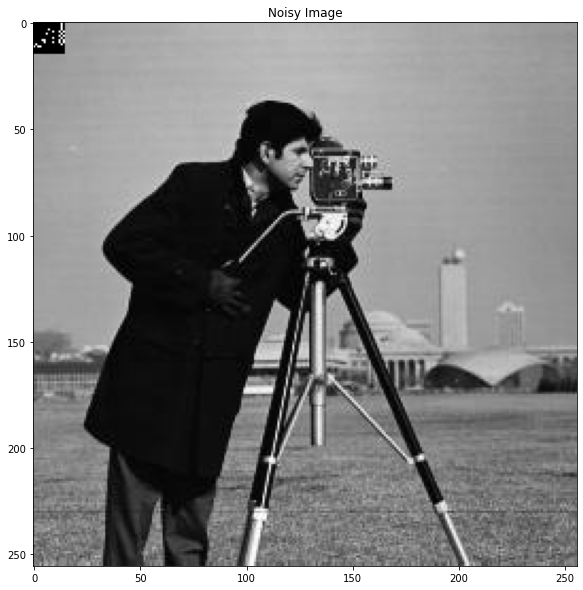

mse 77.98692830403645
psnr 29.21058545884722


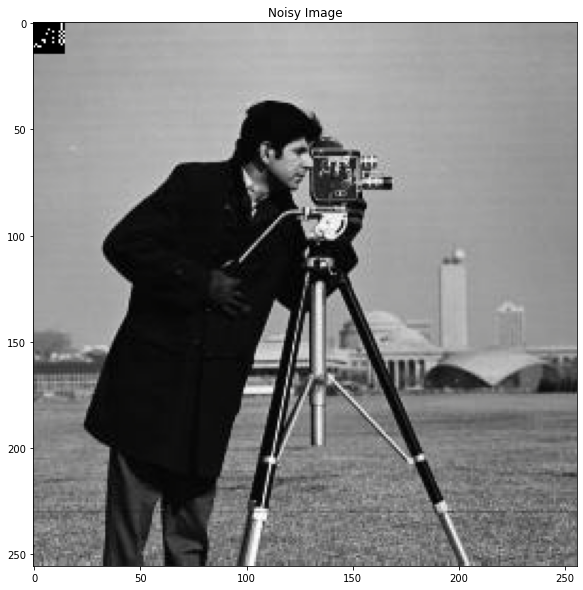

mse 78.00964864095052
psnr 29.20932039044485


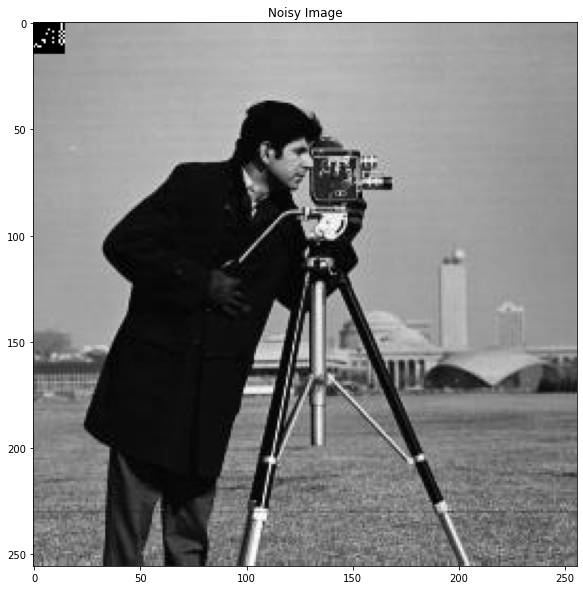

mse 78.09122721354167
psnr 29.204781129925095


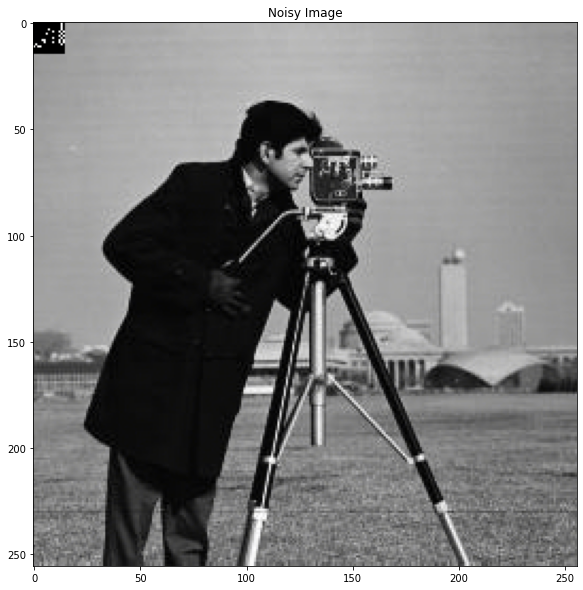

mse 78.49144999186198
psnr 29.182580088817186


In [71]:
mse2 = []
psnr2 = []
for i in [0.02,0.15,0.5,2]:
  temp = gausian_noise('/content/encoded_image_between_pixels.png',0,i)
  print('mse',calculate_mse(temp,'/content/camera_256.JPG'))
  print('psnr',calculate_psnr(temp,'/content/camera_256.JPG'))
  mse2.append(calculate_mse(temp,'/content/camera_256.JPG'))
  psnr2.append(calculate_psnr(temp,'/content/camera_256.JPG'))

In [74]:
mse2

[77.98692830403645, 78.00964864095052, 78.09122721354167, 78.49144999186198]

In [76]:
import pandas as pd 


In [83]:
df = pd.DataFrame(list(zip(mse,psnr,mse2,psnr2)),
               columns=[0.02,0.15,0.5,2])
df.index = ['LSB | MSE','LSB | PSNR','IN-BETWEEN | MSE','IN-BETWEEN | PSNR']
df

,0.02,0.15,0.50,2.00
LSB | MSE,0.013585,66.800077,77.986928,29.210585
LSB | PSNR,0.079432,59.130839,78.009649,29.209320
IN-BETWEEN | MSE,0.207748,54.955426,78.091227,29.204781
IN-BETWEEN | PSNR,0.704152,49.654137,78.491450,29.182580


DataFrame above shows the results of evaluation based on variance of gausian blur 

**Hope it makes sense to you :)**